<a href="https://colab.research.google.com/github/saruti1/PROJECTT/blob/main/jm_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install factor_analyzer==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 459.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41440 sha256=e5cd111f6b4060c3c716955fe76ee4221abcaaa340791d7c3673b9471631ba09
  Stored in directory: /root/.cache/pip/wheels/7d/91/33/1f0cc7cbae768cad407d8dda04f75b484ab7197f91ce8eaaa5
Successfully built factor_analyzer


In [ ]:
!pip install factor_analyzer numpy scipy

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("bfi.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [ ]:
df.shape

(2800, 29)

In [ ]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(2436, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null   floa

In [ ]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [ ]:
df=df.iloc[0:,1:26]

PERFORM ADEQUACY TEST

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.96635086924, 0.0)

test was statistically significant (by comparing alpha  HYPOTHESIS ) :observed correlation matrix is not an identity matrix

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [ ]:
kmo_model

0.848539722194922

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation=None)
corr_matrix = df.corr()
fa.fit(corr_matrix) # Pass the correlation matrix to .fit
#fa.analyze(df, 25, rotation=None)
fa.fit(df)
#fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

AttributeError: Module 'scipy' has no attribute 'sum'

In [ ]:
df.shape[1]

24

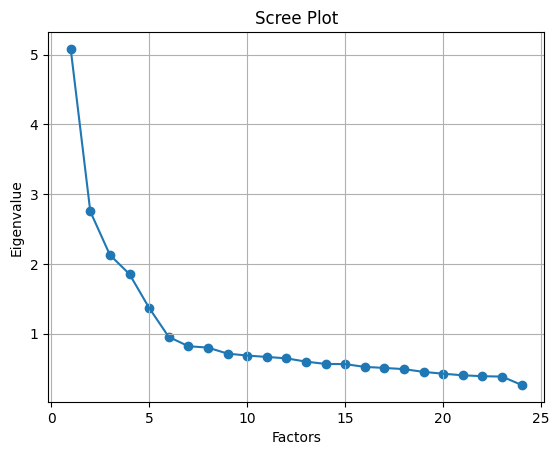

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [ ]:
# Create factor analysis object and perform factor analysis
#fa = FactorAnalyzer()
#fa.analyze(df, 6, rotation="varimax")
fa.set_params(n_factors=6, rotation="varimax")
fa.fit(df)


FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [ ]:
l=fa.loadings_

In [ ]:
l

array([[ 1.99247870e-02,  1.29599477e-01,  1.08493369e-01,
         6.50106496e-01,  9.37413508e-02, -8.90776794e-02],
       [-1.56659140e-02,  2.02526757e-01,  8.30628319e-02,
         7.05661008e-01,  8.13922825e-02,  2.99197755e-02],
       [-8.49660134e-02,  1.27782638e-01,  2.08894187e-01,
         4.80338971e-01, -9.48251960e-02, -3.09117877e-03],
       [-1.54252582e-01,  2.92183000e-01,  7.66966555e-02,
         5.88176932e-01,  7.37243688e-02,  1.47239647e-01],
       [-5.05339093e-03,  6.03148890e-02,  5.58784190e-01,
         4.79819226e-02,  1.90569989e-01,  1.07425859e-01],
       [ 6.77541885e-02,  5.35957947e-03,  6.78855722e-01,
         1.10370082e-01,  9.09718417e-02,  1.54732483e-01],
       [-4.09387920e-02,  8.78274393e-03,  5.44499886e-01,
         1.32513591e-01, -7.04724353e-03, -1.14326286e-02],
       [ 2.15565610e-01, -8.38711863e-02, -6.34552278e-01,
        -6.92807021e-02, -1.33326126e-01,  3.21535098e-01],
       [ 2.79884491e-01, -1.77484152e-01, -5.380

In [ ]:
# Create factor analysis object and perform factor analysis using 5 factors
fa.set_params(n_factors=5, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[ 0.00833786,  0.5846428 ,  0.13395974, -0.09835764,  0.07407246],
       [-0.01763839,  0.69931291,  0.09199825, -0.13956303,  0.08105505],
       [-0.08282639,  0.4832035 ,  0.21733389, -0.09162435, -0.09618347],
       [-0.14589313,  0.64581116,  0.06355234, -0.21482276,  0.09905435],
       [ 0.00893122,  0.08834339,  0.53586973, -0.02567496,  0.21798727],
       [ 0.0829144 ,  0.15669219,  0.63562868,  0.03208207,  0.12428897],
       [-0.032493  ,  0.13484105,  0.55110703,  0.00596031, -0.0011409 ],
       [ 0.22357977, -0.01064   , -0.65282628,  0.10979748, -0.1025801 ],
       [ 0.27742489, -0.08995845, -0.56349132,  0.18554887,  0.0274937 ],
       [ 0.01873396, -0.21346106,  0.03757445,  0.56806472, -0.09344637],
       [ 0.220626  , -0.2609256 , -0.09569711,  0.65721728, -0.08474495],
       [ 0.01732427,  0.42481456,  0.05907807, -0.38886449,  0.32579338],
       [-0.11439277,  0.49316605,  0.07910928, -0.52036002, -0.02167549],
       [ 0.04943346,  0.22953229,  0.3

In [ ]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.68773383, 2.28366914, 2.00367542, 1.83858415, 1.59989443]),
 array([0.11198891, 0.09515288, 0.08348648, 0.07660767, 0.06666227]),
 array([0.11198891, 0.20714179, 0.29062827, 0.36723594, 0.43389821]))